# Linear Regression - part 2

## Seoul Artificial Intelligence Meetup

Martin Kersner, <m.kersner@gmail.com>

2017/11/11

In [1]:
import numpy as np
from sklearn.metrics import r2_score
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

%matplotlib inline

## Simple dataset

In [2]:
X = np.matrix([[1, 2, 3, 4, 5]]).T
y = np.matrix([[0, 3, 2, 4.5, 8]]).T

# If features were not standardized, we have to add ones as a first column to data matrix
X = np.c_[np.ones(X.shape[0]), X]

## Locally weighted linear regression

Linear regression usually underfits the data.


### Fit
$\hat{\beta} = (X^{T}WX)^{-1}X^{T}Wy$

$W$ is matrix (kernel) for weighing data points

**Gaussian kernel**

$w(i,i) = exp(\frac{|x^{i}-x|}{-2k^2})$

### Predict

### Assumption
m > n

In [3]:
# Inspired by book Machine Learning in Action, Peter Harrington
def gaussian(X, k=1.0):
    return np.asscalar(np.exp(X*X.T / (-2.0*k**2)))

def create_kernel(X, X_i, kernel="gaussian", k=1.0):
    """Apply `kernel` as a distance function between given data point `X_i`
    and data matrix `X` containing all data points.
    
    Args
    X    data matrix
    X_i  data point
    """
    def apply_kernel(X_j):
        diff_mat = X_j - X_i
        return eval(kernel)(diff_mat, k)
    
    w = np.apply_along_axis(apply_kernel, axis=1, arr=X)

    return np.diag(w)

### Importance of neighboring data points

In [4]:
def apply_and_plot_gaussian_kernel(k=1.0):
    def gaussian(X, k=1.0):
        return np.exp(np.square(X) / (-2.0*k**2))

    fig = plt.figure()
    ax = fig.add_subplot(111)
    data_range = np.arange(-1, 1.05, 0.05)
    weights = gaussian(data_range, k)
    ax.plot(data_range, weights, marker='o', linestyle='-')
    plt.title("k={}".format(k))

### k=1.0

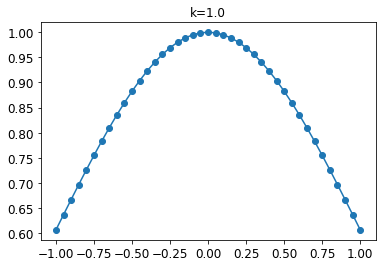

In [5]:
apply_and_plot_gaussian_kernel(k=1.0)

### k=0.5

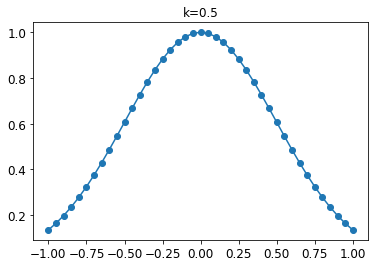

In [6]:
apply_and_plot_gaussian_kernel(k=0.5)

### k=0.1

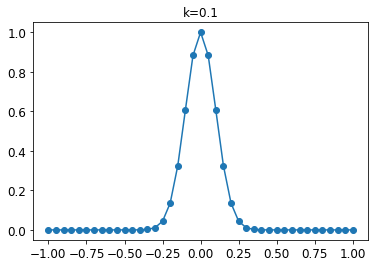

In [7]:
apply_and_plot_gaussian_kernel(k=0.1)

In [8]:
# Inspired by book Machine Learning in Action, Peter Harrington
class LocallyWeightedLinearRegression(object):    
    def fit(self, X, y):
        self.X = X
        self.y = y
    
    def _fit_one(self, X_i):
        W = create_kernel(self.X, X_i)

        WtWX = self.X.T * W * self.X

        # matrix must be non-singular
        assert(np.linalg.det(WtWX) != 0.0)

        β̂  = WtWX.I * self.X.T * W * self.y

        return X_i * β̂ 
    
    def predict(self, X):
        def apply_row(X_row):
            return np.asscalar(self._fit_one(X_row))

        β̂  = np.apply_along_axis(apply_row, axis=1, arr=X)

        return np.array(β̂ )

## Fit simple dataset

In [9]:
lwlr = LocallyWeightedLinearRegression()
lwlr.fit(X, y)
ŷ = lwlr.predict(X)

### Display line fitted with Locally Weighted Linear Regression

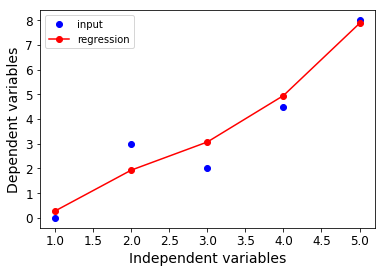

In [10]:
srt_idx = X[:, 1].argsort(0)
x_sort  = X[srt_idx][:, 0, :]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X[:,1], y,  marker='o', linestyle='', color='b', label="input")
ax.plot(x_sort[:, 1], ŷ[srt_idx],  marker='o', linestyle='-', color='r', label="regression")
plt.ylabel('Dependent variables')
plt.xlabel('Independent variables')
plt.legend()

## Evaluation

### Correlation

In [11]:
np.corrcoef(y.T, ŷ.T)

array([[ 1.       ,  0.9645694],
       [ 0.9645694,  1.       ]])

In [12]:
r2_score(y, ŷ)

0.92820941931747292